# Closest pairs

In this noteobok, we are going to test the different strategies for the problem of finding the closest pairs of points in a graph.

- The **brute force** approach: eveluation of all the pairs
- The **divide to conquer** aprroch: with a split of the graph on the x-axis

In [1]:
from inputs import InputListPointsXY as Points
from utils import euclidean_distance as d

(<Figure size 1332x1332 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1155673d0>)

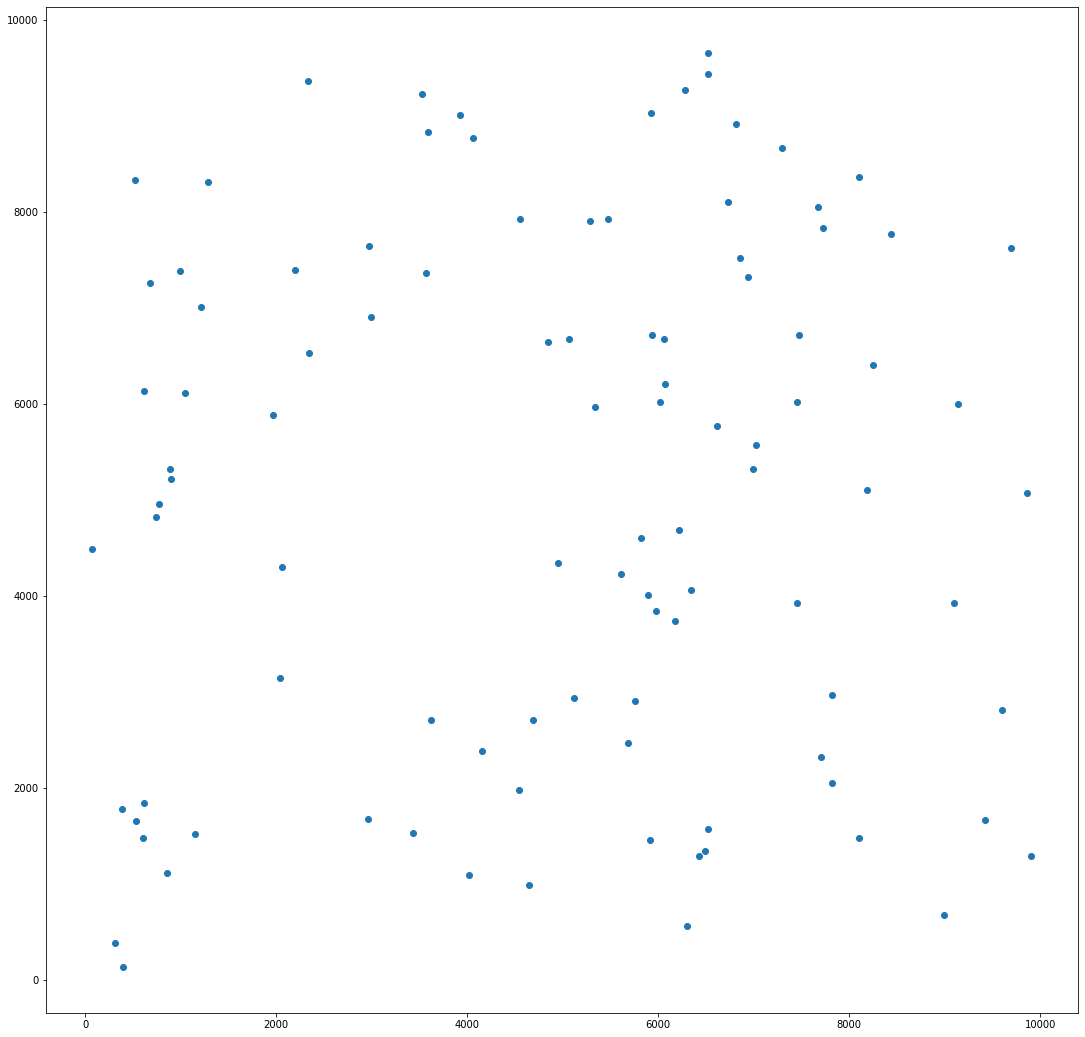

In [2]:
example_points = Points(l_length=100)
example_points.plot()

## Brute force

As mentionned in the README.md file, this approach compares every pairs of points to reevaluate the minimum

In [3]:
def brute_force_closest_pairs(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:], i+1):
            if d(point1, point2) < min_distance:
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
                print(f'The minimal distance between the points is now {d(point1, point2)}')
    return point_min1, point_min2, min_distance

brute_force_closest_pairs(Points(l_length=1000))

The minimal distance between the points is now 3293.3949049574967
The minimal distance between the points is now 2494.6009700952172
The minimal distance between the points is now 2331.871565931537
The minimal distance between the points is now 1914.1327017738347
The minimal distance between the points is now 1075.9405188020387
The minimal distance between the points is now 897.6591780848676
The minimal distance between the points is now 227.00881040171106
The minimal distance between the points is now 52.15361924162119
The minimal distance between the points is now 32.7566787083184
The minimal distance between the points is now 13.416407864998739
The minimal distance between the points is now 10.770329614269007
The minimal distance between the points is now 8.94427190999916
The minimal distance between the points is now 7.280109889280518


(630, 841, 7.280109889280518)

Note that the if statement is true around 10 times for a 1000-point long list, which is an indicator of the lack of performance of the algorithm. 
More precisely the nested loops have 1000 choose 2 = **499500** iterations.

Let's compute the indicator of performance as:
`nb of reeavaluations of the min / nb of itarations`

In [4]:
def brute_force_closest_pairs_performance(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    # Initialize the counters
    nb_itarations, nb_reevaluations_min = 0, 0
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:], i+1):
            nb_itarations += 1
            if d(point1, point2) < min_distance:
                nb_reevaluations_min += 1
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
    return round((nb_reevaluations_min / nb_itarations) * 100, 3)

print(f'The indicator of the performance of the algorithm could be: \n \
    {brute_force_closest_pairs_performance(Points(l_length=1000))} %')

The indicator of the performance of the algorithm could be: 
     0.003 %


You can run the previous cell several times and see that it stays under the 0.01%

Let's save a clean version of the brute force function in a.py file and import it

In [7]:
from closest_pair_algorithms.brute_force import brute_force_points as bf

## Visualize the solution

Let's draw a line between the two closet points to check if the solution looks correct

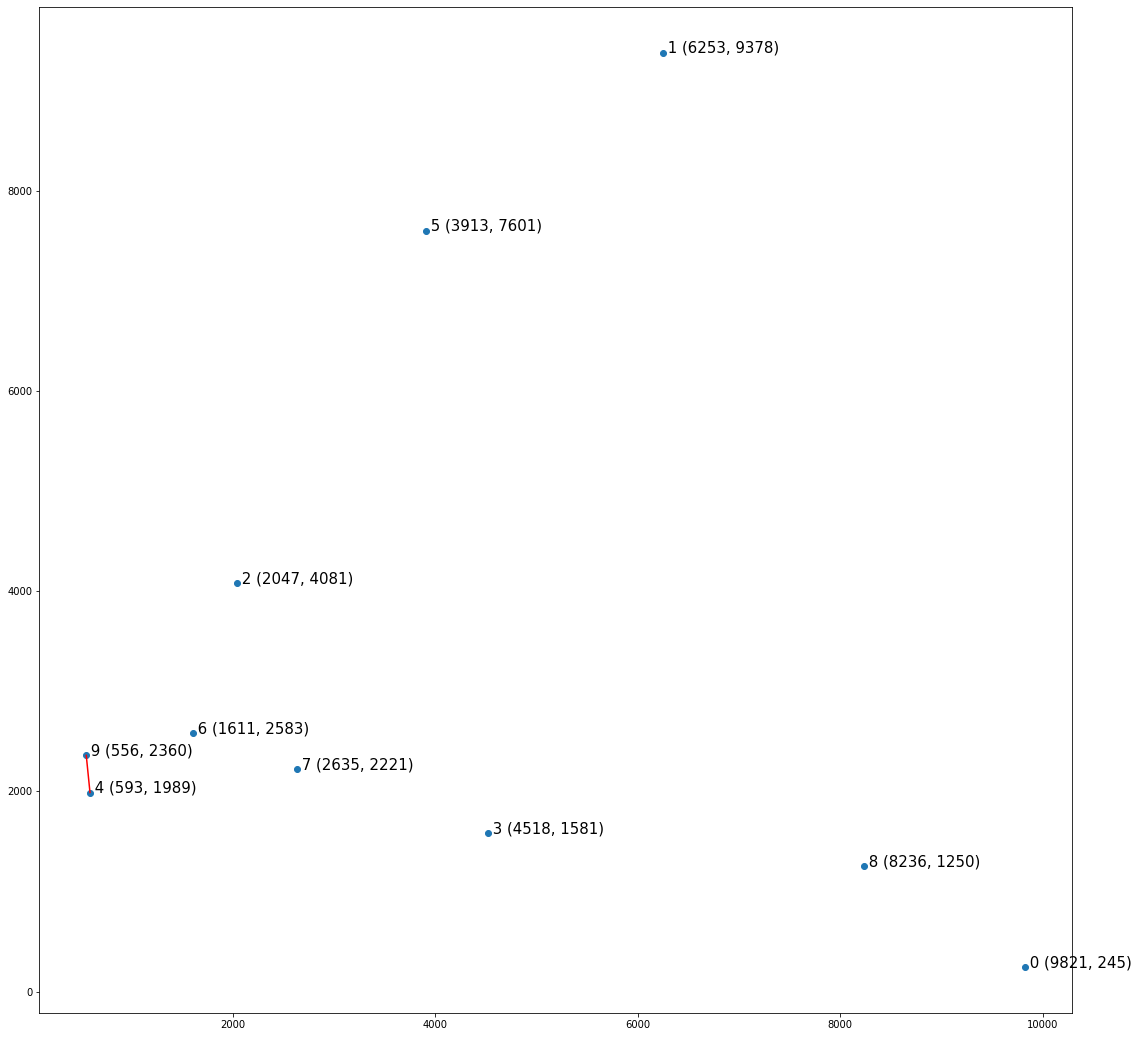

(<Figure size 1332x1332 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118464790>)

In [8]:
# Generate a set of 10 point
example_points = Points(l_length=10)
# Compute the solution
point1, point2 = bf(example_points)
# Draw the line and show the solution
example_points.plot_line_between(point1, point2, annotate=True)

## Divide to conquer approach